<a href="https://colab.research.google.com/github/bodarynka/pyton-data-analytycs/blob/main/%D0%91%D0%BE%D1%8F%D0%BA%D1%96%D0%B2%D1%81%D1%8C%D0%BA%D0%B0_%22hw_4_3_%D0%A0%D0%BE%D0%B1%D0%BE%D1%82%D0%B0_%D0%B7_DataFrame_%D0%94%D1%96%D0%B0%D0%B3%D1%80%D0%B0%D0%BC%D0%B0_%D1%80%D0%BE%D0%B7%D1%81%D1%96%D1%8E%D0%B2%D0%B0%D0%BD%D0%BD%D1%8F_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому ДЗ ми потренуємось будувати візуалізації з використанням бібліотеки `maplotlib` для візуалізації даних в `pandas.DataFrame`.

# Опис бізнес задачі та набору даних

Набір даних "Yulu" містить інформацію про попит на спільні електровелосипеди в Індії, що надаються провідним індійським постачальником мікромобільності Yulu. Ця компанія пропонує унікальні транспортні засоби для щоденних поїздок з метою усунення транспортних заторів в Індії та забезпечення безпечного, зручного та доступного рішення для пересування. Зони Yulu розташовані в оптимальних місцях, включаючи станції метро, автобусні зупинки, офісні простори, житлові райони та корпоративні офіси, щоб полегшити поїздки на перші та останні кілометри.

Останнім часом Yulu зіткнулася зі значними зниженнями доходів, тому компанія звернулася до консалтингової фірми з метою зрозуміти, від яких факторів залежить попит на ці спільні електровелосипеди, особливо на індійському ринку.

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів


0. Імпортуйте бібліотеки `matplotlib.pyplot` та `pandas`


In [2]:
import matplotlib.pyplot as plt
import pandas as pd


1. Завантажте дані з файла `yulu_rental.csv` у pandas.DataFrame `df`.

In [4]:
df = pd.read_csv('/content/yulu_rental.csv')


2. Виведіть

- перші 3 записи з набору даних
- типи даних в наборі даних
- розміри набору даних

In [8]:
df.head(3)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [9]:
df.dtypes


,0
datetime,object
season,int64
holiday,int64
workingday,int64
weather,int64
temp,float64
atemp,float64
humidity,int64
windspeed,float64
casual,int64


In [10]:
df.shape

(10886, 12)

Перетворимо колонку `datetime` на тип даних `pd.datetime` - це нам доопоможе в подальшій роботі. Просто запустіть колонку нижче і занатуйте собі цей метод роботи з колонкою, в якій міститься дата і час.
Наша колонка тепер стане таймпстемпом і для неї став доступний функціонал, описаний тут

https://pandas.pydata.org/docs/reference/api/pandas.Timestamp.html

Наприклад, ми можемо легко виокремити дату, день тижня, чи це робочий день, чи ні.

In [11]:
df['datetime'] = pd.to_datetime(df.datetime)

3. З допомогою matplotlib побудуйте найпростіший лінійний графік кількості зареєстрованих користувачів (`registered`) на кожну годину.

In [12]:
hourly_data = df.groupby(df['datetime'].dt.hour)['registered'].sum()

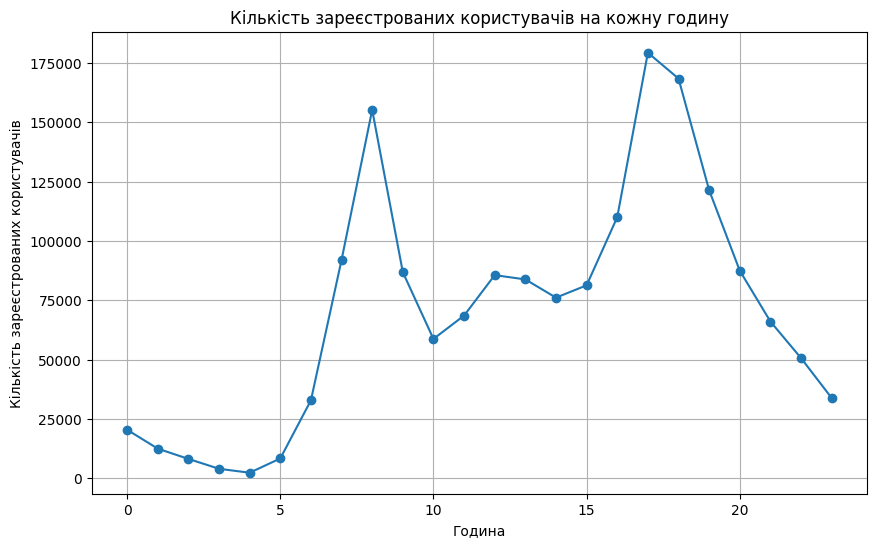

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(hourly_data.index, hourly_data.values, marker='o')
plt.title('Кількість зареєстрованих користувачів на кожну годину')
plt.xlabel('Година')
plt.ylabel('Кількість зареєстрованих користувачів')
plt.grid(True)

Має вийти щось таке:
![](https://drive.google.com/uc?export=view&id=1WX6s9qmiwq_1TSHQtRX0bPL8sT6Gw2BH)

4. Графік виглядає так собі, правда? Давайте загрегуємо дані по дням. Для цього запустіть наступний код аби створити колонку "дата" (без часу) і після цього напишіть самостійно код, аби загрегувати дані і отримати кількість зарестрованих клієнтів на день. Ваша фінальна структура (запишіть її в змінну `df_registered_by_date`) даних має містити дві колонки: дату і кількість зареєстрованих користувачів на цей день.

In [14]:
df['date'] = df.datetime.dt.date

In [17]:
df_registered_by_date = df.groupby('date')['registered'].sum().reset_index()

df_registered_by_date

,date,registered
0,2011-01-01,654
1,2011-01-02,670
2,2011-01-03,1229
3,2011-01-04,1454
4,2011-01-05,1518
...,...,...
451,2012-12-15,4280
452,2012-12-16,3248
453,2012-12-17,4373
454,2012-12-18,5124


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1DL7Y-R7_CBWNlQNAnMyAoU8hR2MdF5v7)


5. Тепер побудуйте лінійний графік з matplotlib для даних в `df_registered_by_date`.

  Додайте наступну частину до графіку аби зробити підписи за віссю ОХ більш читаємими

  `plt.xticks(rotation=45, ha='right')`

  Після побудови графіку проаналізуйте його та напишіть, які тенденції щодо зміни кількості зареєстрованих користувачів в часі ви бачите і чому так може бути?

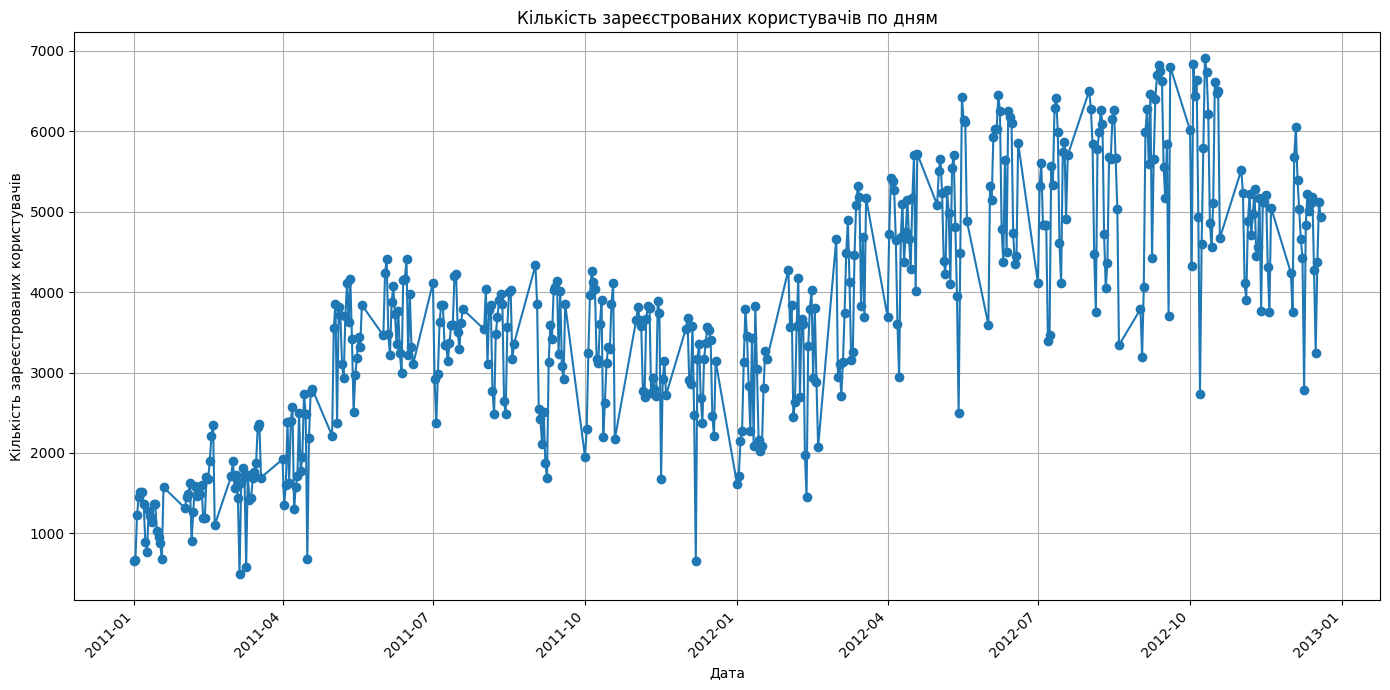

In [18]:
# Створюємо графік
plt.figure(figsize=(14, 7))
plt.plot(df_registered_by_date['date'], df_registered_by_date['registered'], marker='o', linestyle='-')

# Додаємо заголовки та підписи
plt.title('Кількість зареєстрованих користувачів по дням')
plt.xlabel('Дата')
plt.ylabel('Кількість зареєстрованих користувачів')

# Налаштування підписів по осі X для кращої читабельності
plt.xticks(rotation=45, ha='right')

# Показуємо графік
plt.grid(True)
plt.tight_layout()

Аналіз тенденцій:
Тенденції в кількості зареєстрованих користувачів: Графік показує коливання в кількості зареєстрованих користувачів по дням. Можуть бути помітні як періоди зростання, так і спади.

Періоди зростання: Можуть бути пов’язані з вихідними днями, святами або акціями, що стимулюють реєстрацію нових користувачів.

Періоди спадів: Можуть відповідати будням, робочим дням або періодам без маркетингової активності.

Чому так може бути? Вплив можуть мати зовнішні фактори, такі як маркетингові кампанії, погодні умови або навіть технічні проблеми, що впливають на доступність реєстрації. Вихідні дні можуть стимулювати активність користувачів більше, ніж будні, що також відображається на графіку. Аналізуючи ці дані, можна приймати рішення щодо покращення маркетингових стратегій для стимулювання реєстрацій у слабші періоди.

6. Побудуйте графік розсіювання (scatterplot) між температурою і тим, як вона відчувається (atemp). Поставте прозорість точок 0.2. Додайте підписи до осей Х ат У. Опишіть свої спостереження з цього графіку. Які висновки можна зробити? Що дивного бачите?

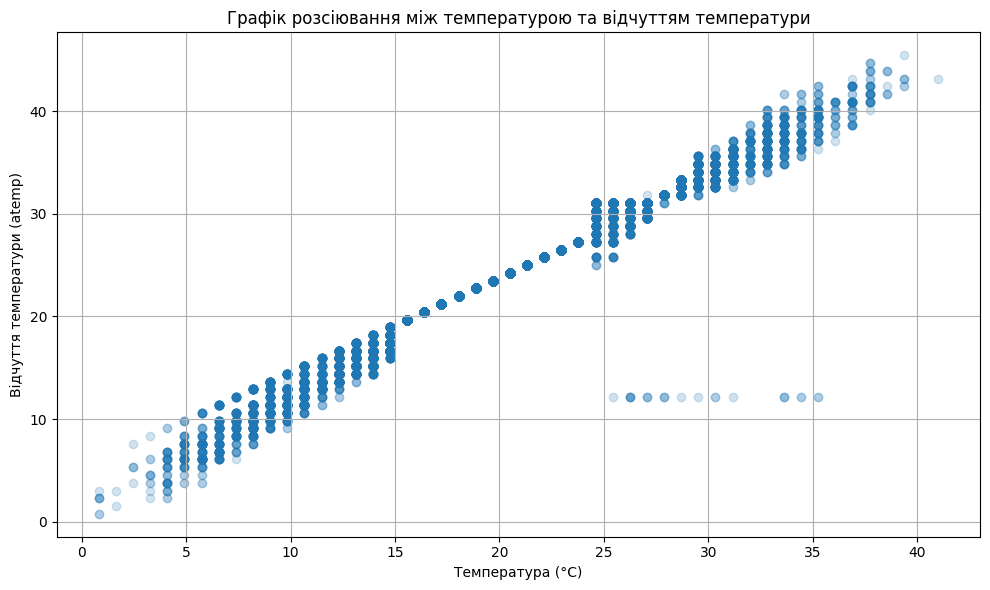

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(df['temp'], df['atemp'], alpha=0.2)

# Додаємо підписи до осей
plt.xlabel('Температура (°C)')
plt.ylabel('Відчуття температури (atemp)')

# Додаємо заголовок
plt.title('Графік розсіювання між температурою та відчуттям температури')

# Показуємо графік
plt.grid(True)
plt.tight_layout()

  Очікуваний графік:
![](https://drive.google.com/uc?export=view&id=13Mi6AGPUh5aQ5YEZjrlkQPuFcNzeeppB)


Спостереження та висновки:
 На графіку помітно, що існує майже лінійний зв’язок між реальною температурою (temp) та відчуттям температури (atemp). Це логічно, оскільки відчуття температури має бути близьким до фактичної температури.

Точковий Розкид:
 Прозорість точок дозволяє побачити щільність даних: чим більше точок перекривається, тим більш насичений колір у цьому місці. Це дає уявлення про те, що значення atemp, як правило, близькі до значень temp.

Мінімальні Відхилення:
Хоча більшість точок лінійно розташовані навколо діагоналі (y = x), є деякі незначні відхилення. Це може бути пов'язано з впливом додаткових факторів, які впливають на відчуття температури, наприклад, вологість чи вітер.

Що Дивного:
 Немає значних аномалій чи точок, які сильно відрізняються від загальної тенденції. Якщо б були великі відхилення від лінії, це могло б вказувати на проблеми з даними або наявність інших факторів, які значно впливають на відчуття температури.

Висновок:

Графік підтверджує очікуваний прямий зв'язок між фактичною температурою і відчуттям температури. Невеликі відхилення від лінійного зв’язку вказують на додаткові фактори, але загалом ці два показники корелюють дуже добре. Це свідчить про те, що при прогнозуванні відчуття температури можна впевнено використовувати фактичну температуру.